In [351]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/d5af9158617c6bf4fd77b830ed1adfb1.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/bcb1f02a227155de5ed34606823143d0.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/33775035ef8ef46774df48dce0cdff18.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/91544c7531dcfdae8bd46b4d34f52adf.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/9b88d992abdbc346d1ace865583165ef.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/f751509ec12198a853cbb892bb637d83.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/c6346de08fc636aeb0b266077d939fce.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/32f24003e851b205219c8770d223c724.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/36aed6f4fce5339677328f457fbc3d77.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/937c27cae60f3c1a42c8444c659ec1ef.jpg
/kaggle/input/ar-data/data-AR-update2/ML-AR-Modern/22a1b66e0f796e46fcac7e6de195d94a.jpg
/kaggle/input/ar-data/data-AR-up

In [352]:
!pip install python_splitter

In [353]:
import python_splitter
# If you want to create only Train-Test Folder(not Validation Folder)
python_splitter.split_from_folder("/kaggle/input/ar-data/data-AR-update2", train = 0.7, test = 0.3)

✅Checking SOURCE directory...
0.7 0 0.3
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [354]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [355]:
target_img_shape = (224,224)
train_dir = '/kaggle/working/Train_Test_Folder/train'
val_dir = '/kaggle/working/Train_Test_Folder/test'

In [356]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_set = train_datagen.flow_from_directory(train_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

# Augmenting training data with transformations
# train_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=0,      # Randomly rotate images by 20 degrees
#     width_shift_range=0.2,  # Randomly shift images horizontally (15% of the width)
#     height_shift_range=0.2, # Randomly shift images vertically (15% of the height)
#     shear_range=0.9,       # Randomly apply shearing
#     zoom_range=0.2,        # Randomly zoom inside pictures
#     horizontal_flip=True,   # Randomly flip images horizontally
#     fill_mode='nearest'     # Fill pixels when the image is rotated or shifted
# )

# train_set = train_datagen.flow_from_directory(
#     train_dir, 
#     target_size=target_img_shape, 
#     batch_size=32, 
#     class_mode='sparse'
# )

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_set = val_datagen.flow_from_directory(val_dir, target_size = target_img_shape, batch_size = 32, class_mode = 'sparse')

Found 270 images belonging to 13 classes.
Found 120 images belonging to 13 classes.


{'ML-AR-COLONIAL': 0, 'ML-AR-Chicago School': 1, 'ML-AR-Classic': 2, 'ML-AR-MEDITERRANEAN': 3, 'ML-AR-MID CENTURY': 4, 'ML-AR-Modern': 5, 'ML-AR-Modern Minimal': 6, 'ML-AR-Oriental': 7, 'ML-AR-SCANDINAVIAN': 8, 'ML-AR-THAI': 9, 'ML-AR-TRANSITIONAL': 10, 'ML-AR-TUDOR HOUSE': 11, 'ML-AR-VICTORIAN': 12}
(32, 224, 224, 3)
(32,)
class 11.0


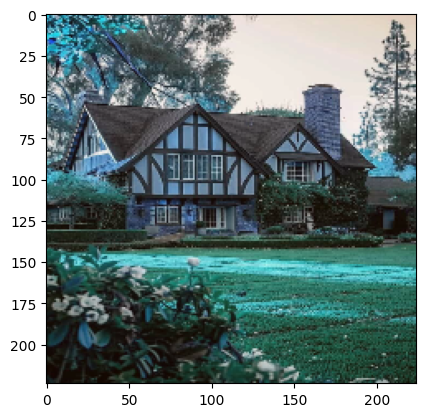

In [357]:
print(train_set.class_indices)
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)

    img = image_batch[0] - image_batch[0].min()
    img /= 275.0
    plt.imshow(img)
    print('class', labels_batch[0])
    break

In [358]:
ids, counts = np.unique(train_set.classes, return_counts = True)
print(ids)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[20 21 20 20 26 11 20 20 20 20 20 32 20]


In [359]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>8} = {}'.format(labels[i], counts[i]))

ML-AR-COLONIAL = 20
ML-AR-Chicago School = 21
ML-AR-Classic = 20
ML-AR-MEDITERRANEAN = 20
ML-AR-MID CENTURY = 26
ML-AR-Modern = 11
ML-AR-Modern Minimal = 20
ML-AR-Oriental = 20
ML-AR-SCANDINAVIAN = 20
ML-AR-THAI = 20
ML-AR-TRANSITIONAL = 20
ML-AR-TUDOR HOUSE = 32
ML-AR-VICTORIAN = 20


In [360]:
ids, counts = np.unique(val_set.classes, return_counts = True)
print(ids)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 9  9  9  9 12  5  9  9  9  8  9 14  9]


In [361]:
_, train_count = np.unique(train_set.classes, return_counts = True)
_, val_count = np.unique(val_set.classes, return_counts = True)

print('Ratio Validation/Training set:', val_count/train_count * 100)

Ratio Validation/Training set: [45.         42.85714286 45.         45.         46.15384615 45.45454545
 45.         45.         45.         40.         45.         43.75
 45.        ]


In [362]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)
in_shape

(224, 224, 3)

# Treansfer learning ResNet50

In [363]:
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
base_model = ResNet50(include_top=False,
                      weights='imagenet',
                      input_shape=in_shape)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Replacing Flatten with GAP to reduce overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))  # Output layer for 13 classes

model.summary()


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [364]:
base_model.trainable = False

# CNN

In [365]:
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# # Model architecture
# model = Sequential()

# # First convolutional block
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape, padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Second convolutional block
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Third convolutional block
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten and dense layers
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer for 13 classes
# model.add(Dense(13, activation='softmax'))

# model.summary()


In [366]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)

Trainable..
---


In [367]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [368]:
# import time
# from tensorflow.keras.optimizers import Adam

# # model.compile(loss='sparse_categorical_crossentropy', 
# #               optimizer=Adam(learning_rate=0.001),
# #               metrics=['accuracy'])

# model.compile(optimizer=Adam(learning_rate=0.001), 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])

# es = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True)
# mc = ModelCheckpoint('best_model13cls.keras', monitor='val_accuracy', verbose = 1, save_best_only = True)

# start = time.time()
# history = model.fit(train_set,
#                     validation_data=val_set,
#                     epochs=100, verbose=1, callbacks=[es, mc])
# end = time.time()

# print("Time Taken: {:.2f} minutes".format((end - start)/60))

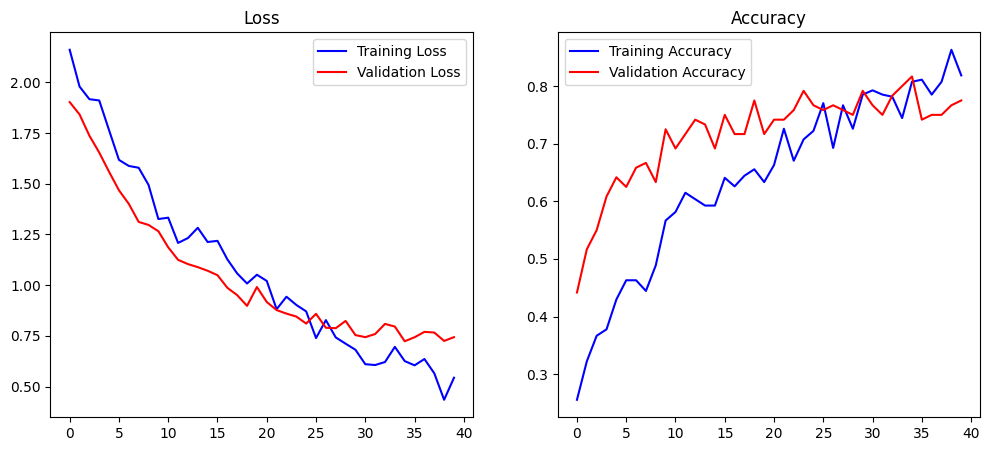

9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.8080 - loss: 0.5776 - val_accuracy: 0.7750 - val_loss: 0.7438
Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 35.
Time Taken: 25.87 minutes


In [370]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from IPython.display import clear_output, display

# Model Compilation
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks
es = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_model13cls.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

# Custom Callback for Real-Time Plotting with IPython.display
class RealTimePlot(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = []
        self.losses = []
        self.val_losses = []
        self.accuracies = []
        self.val_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch)
        self.losses.append(logs['loss'])
        self.val_losses.append(logs['val_loss'])
        self.accuracies.append(logs['accuracy'])
        self.val_accuracies.append(logs['val_accuracy'])

        # Clear the output and plot the updated data
        clear_output(wait=True)
        plt.figure(figsize=(12, 5))

        # Plotting the losses
        plt.subplot(1, 2, 1)
        plt.plot(self.epochs, self.losses, label='Training Loss', color='b')
        plt.plot(self.epochs, self.val_losses, label='Validation Loss', color='r')
        plt.title("Loss")
        plt.legend()

        # Plotting the accuracies
        plt.subplot(1, 2, 2)
        plt.plot(self.epochs, self.accuracies, label='Training Accuracy', color='b')
        plt.plot(self.epochs, self.val_accuracies, label='Validation Accuracy', color='r')
        plt.title("Accuracy")
        plt.legend()

        plt.show()

# Instantiate the custom callback
real_time_plot = RealTimePlot()

# Training the model with the custom callback
start = time.time()
history = model.fit(train_set,
                    validation_data=val_set,
                    epochs=100, 
                    verbose=1, 
                    callbacks=[es, mc, real_time_plot])
end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))


In [384]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import numpy as np

# # Assuming `test_set` is your data generator for test data
# y_true = val_set.classes  # True labels
# y_pred = model.predict(val_set)
# y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices

# # Create the confusion matrix
# cm = confusion_matrix(y_true, y_pred_classes)
# print(cm)
# # Displaying the confusion matrix with labels if available
# labels_confuse = list(val_set.class_indices.keys())  # Assuming the test_set contains class indices
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_confuse)
# disp.plot(cmap='viridis')  # You can choose other colormap like 'plasma', 'Blues', etc.
# plt.xticks(rotation=90)
# plt.show()

In [371]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=1)
print('score = {:.3f}'.format(acc[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8246 - loss: 0.7407
score = 0.817


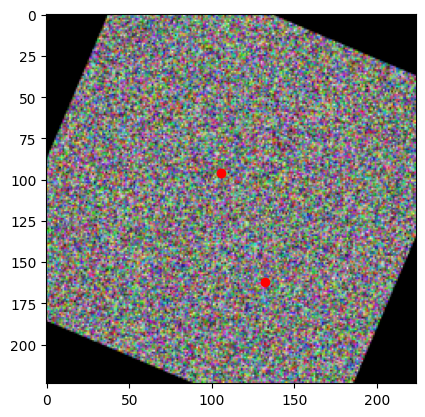

In [394]:
import imgaug.augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from imgaug.augmentables.kps import KeypointsOnImage, Keypoint
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

# Example image (assuming `img` is a NumPy array of shape (H, W, C))
img = np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8)  # Replace with your actual image

# Define keypoints (example keypoints)
keypoints = [Keypoint(x=100, y=100), Keypoint(x=150, y=150)]
kps = KeypointsOnImage(keypoints, shape=img.shape)

# Augmenter (e.g., random rotation)
augmenter = iaa.Affine(rotate=(-25, 25))

# Apply the augmenter
img_aug, kps_aug = augmenter(image=img, keypoints=kps)

# Visualize the results
img_aug = array_to_img(img_aug)  # Convert NumPy array to PIL image for visualization
plt.imshow(img_aug)
for kp in kps_aug.keypoints:
    plt.plot(kp.x, kp.y, 'ro')  # Plot keypoints on the image
plt.show()


In [374]:
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# def predict(img_fname):
#     # Load and preprocess the image
#     img = load_img(img_fname, target_size=target_img_shape)  # Adjust target_img_shape as per your model's input
#     plt.figure()  # Open a new figure for each image
#     plt.imshow(img)
#     plt.axis('off')  # Turn off axes for better viewing
#     plt.title(os.path.basename(os.path.dirname(img_fname)))
#     plt.show()

#     img = img_to_array(img)
#     img = np.expand_dims(img, axis=0)
#     img = preprocess_input(img)
    
#     # Make prediction
#     pred = model.predict(img)
#     pred_probabilities = pred[0].round(2)  # Round prediction probabilities to 2 decimal places

#     # Display each label with its corresponding probability
#     for label, probability in zip(labels.items(), pred_probabilities):
#         print(f"{label} : {round(probability, 2)*100:.2f} %")

#     # Extracting the actual class from the file path
#     actual_cls = os.path.basename(os.path.dirname(img_fname))  # Assumes the image file is within a folder named by its class
#     print('Actual Class:', actual_cls)
    
#     # Get the predicted class
#     pred_cls = labels[np.argmax(pred, -1)[0]]
#     print('Prediction:', pred_cls) # , pred_probabilities
    
# # predict('/kaggle/working/Train_Test_Folder/train/ML-AR-MID CENTURY/286f4d5c04da93e3c4686015d653db38 (1).jpg')

In [377]:
def predict(img_fname):
    # Load and preprocess the image
    img = load_img(img_fname, target_size=target_img_shape)  # Adjust target_img_shape as per your model's input
    plt.figure()  # Open a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Turn off axes for better viewing
    plt.title(os.path.basename(os.path.dirname(img_fname)))
    plt.show()

    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    
    # Make prediction
    pred = model.predict(img)
    pred_probabilities = pred[0]

    # Get the top 3 predictions
    top_indices = pred_probabilities.argsort()[-3:][::-1]  # Indices of top 3 predictions
    top_labels = [(list(labels.values())[i], pred_probabilities[i]) for i in top_indices]  # Assuming `labels` is a dictionary or list

    # Display the top 3 predictions with their probabilities
    print("Top 3 Predictions:")
    for label, probability in top_labels:
        print(f"{label} : {round(probability * 100, 2):.2f}%")

    # Extracting the actual class from the file path
    actual_cls = os.path.basename(os.path.dirname(img_fname))  # Assumes the image file is within a folder named by its class
    print('Actual Class:', actual_cls)
    
    # Get the predicted class (highest probability)
    pred_cls = list(labels.values())[np.argmax(pred, -1)[0]]
    print('Prediction:', pred_cls)


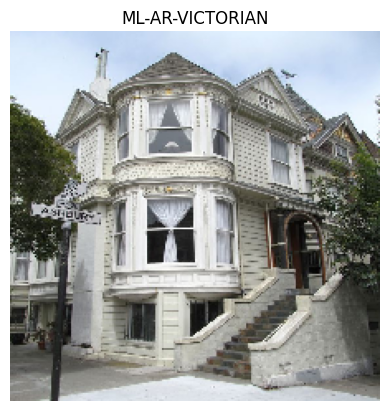

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Top 3 Predictions:
ML-AR-VICTORIAN : 83.42%
ML-AR-COLONIAL : 5.27%
ML-AR-Classic : 4.21%
Actual Class: ML-AR-VICTORIAN
Prediction: ML-AR-VICTORIAN


In [398]:
 predict('/kaggle/working/Train_Test_Folder/test/ML-AR-VICTORIAN/150ae97615a2cca081f696d38cd53766.jpg')

In [ ]:
# predict('/kaggle/working/Train_Test_Folder/test/ML-AR-Modern Minimal/7f6cae1e68e3d23a2c5c6fe2b1e455cd.jpg')

In [397]:
import glob

import glob

# Get all images in the subfolders of "test"
mylist = [f for f in glob.glob('/kaggle/working/Train_Test_Folder/test/**/*', recursive=True) if not os.path.isdir(f)]

# # Print the list of image paths
# print(mylist)

# for i in mylist:
#     predict(i)
#     # print(os.path.basename(i), end = '/')